Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_ost_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_wt_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_wt_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 3)
(6459, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
nan_gene = list(DESeq_sorted[DESeq_sorted['padj'].isnull()].index.values)
DESeq_sorted = DESeq_sorted.drop(nan_gene)
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPCC1672.03c,619.447489,-1.467548,0.192991,56.572055,5.417633e-14,3.492206e-10
SPAC5H10.03,2506.637353,-1.176188,0.160562,52.160078,5.115565e-13,1.648746e-09
SPAC977.16c,85.291717,-2.416383,0.336923,47.698601,4.970463e-12,1.067987e-08
SPAC5H10.10,295.816620,-1.366625,0.205295,44.827783,2.151482e-11,3.467114e-08
SPBPB2B2.01,30.397561,-3.170477,0.514575,35.029117,3.248119e-09,4.187474e-06
...,...,...,...,...,...,...
SPAC644.06c,488.009685,-0.000127,0.223992,0.000067,9.934497e-01,9.940666e-01
SPCC1322.05c,436.501129,0.000601,0.235171,0.000035,9.952677e-01,9.957311e-01
SPNCRNA.1089,7.041109,-0.002738,0.752376,0.000030,9.956020e-01,9.959110e-01
SPAC222.03c,538.072749,-0.000819,0.225058,0.000014,9.969986e-01,9.971533e-01


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted = GPcounts_NB.drop(nan_gene)
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPAC212.11,-62.746378,-63.197430,4.510517e-01
SPAC212.09c,-85.042194,-84.242970,-7.992237e-01
SPAC212.04c,-71.002279,-71.002230,-4.937455e-05
SPAC212.01c,-21.412468,-21.412468,-5.196952e-08
SPNCRNA.601,-58.330947,-58.326558,-4.389033e-03
...,...,...,...
SPMITTRNATYR.01,-132.124855,-131.870852,-2.540029e-01
SPMITTRNAILE.02,-125.721473,-125.618338,-1.031349e-01
SPMIT.10,-168.568080,-168.572458,4.378064e-03
SPMITTRNAGLU.01,-177.886767,-177.871843,-1.492402e-02


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G.drop(nan_gene)
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPAC212.11,-24.572469,-24.724478,0.152009
SPAC212.09c,-15.460841,-14.944630,-0.516211
SPAC212.04c,-22.634089,-17.722263,-4.911826
SPAC212.01c,-14.571765,-14.571508,-0.000257
SPNCRNA.601,-23.099102,-23.099075,-0.000027
...,...,...,...
SPMITTRNATYR.01,-5.281460,-5.281257,-0.000203
SPMITTRNAILE.02,-9.033100,-9.033096,-0.000004
SPMIT.10,-0.231256,-0.242763,0.011506
SPMITTRNAGLU.01,-12.439937,-12.439911,-0.000026


sort GPcounts results according to DESeq2 

In [6]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPCC1672.03c,-117.124159,-145.910518,2.878636e+01
SPAC5H10.03,-139.268524,-167.548217,2.827969e+01
SPAC977.16c,-89.060044,-110.859372,2.179933e+01
SPAC5H10.10,-102.601863,-150.505820,4.790396e+01
SPBPB2B2.01,-73.972395,-89.699885,1.572749e+01
...,...,...,...
SPAC644.06c,-114.277955,-114.258479,-1.947617e-02
SPCC1322.05c,-113.189785,-113.149157,-4.062740e-02
SPNCRNA.1089,-54.893428,-54.890854,-2.574799e-03
SPAC222.03c,-116.094317,-116.082093,-1.222404e-02


In [7]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
SPCC1672.03c,-1.939309,-13.785078,11.845769
SPAC5H10.03,0.502300,-10.150630,10.652930
SPAC977.16c,-13.471360,-22.868177,9.396817
SPAC5H10.10,-1.541200,-13.234572,11.693372
SPBPB2B2.01,-18.973557,-26.939517,7.965960
...,...,...,...
SPAC644.06c,-3.709946,-2.980112,-0.729834
SPCC1322.05c,-4.176487,-4.176486,-0.000001
SPNCRNA.1089,-23.580068,-23.580059,-0.000009
SPAC222.03c,-3.064691,-3.064667,-0.000024


{0.0: 6337, 1.0: 109}
{0.0: 6049, 1.0: 397}
{0.0: 4793, 1.0: 1653}


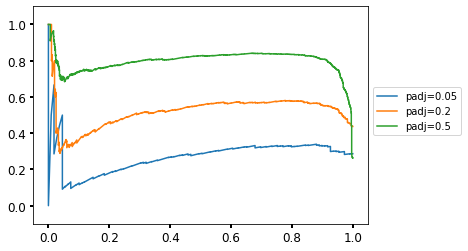

{0.0: 6337, 1.0: 109}
{0.0: 6049, 1.0: 397}
{0.0: 4793, 1.0: 1653}


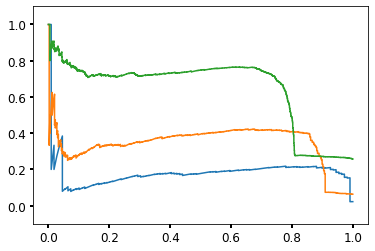

In [9]:
padj = [.05,.2,.5]
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(3):
        true_label = np.zeros(D)
  

        for j in range(D):
            if DESeq_sorted['padj'][j] <= padj[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='padj='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()


0.1
0.0020329826716408827


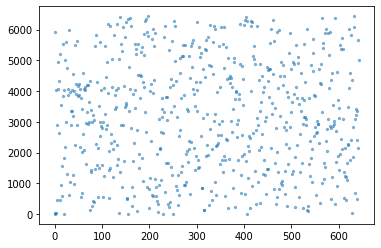

0.0020329826716408827


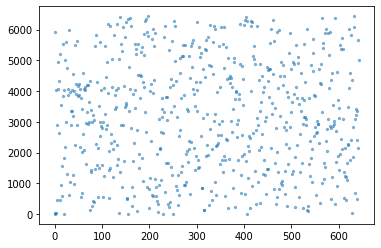

0.2
0.0666582882728522


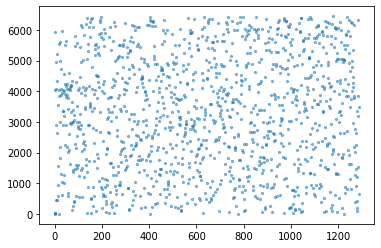

0.0666582882728522


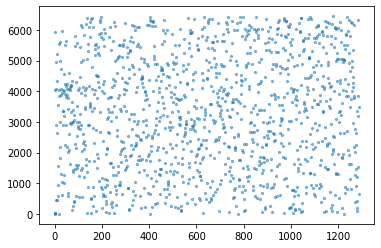

0.30000000000000004
-0.011573086383865066


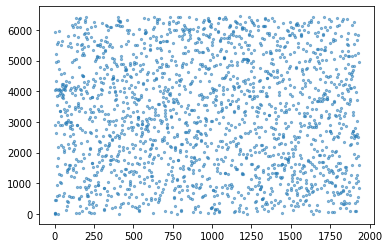

-0.011573086383865066


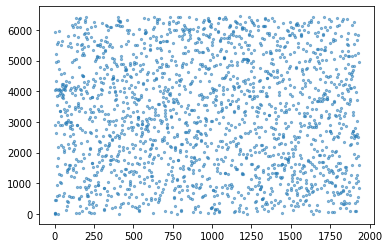

0.4
-0.025083164570541695


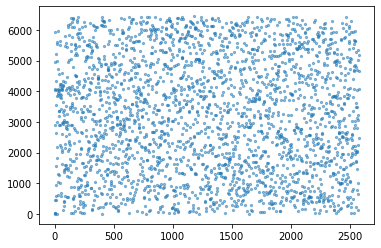

-0.025083164570541695


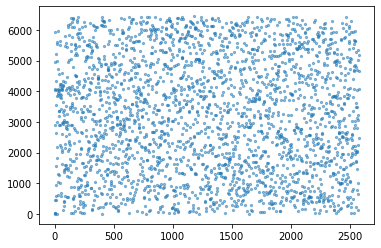

0.5
-0.009697703224409448


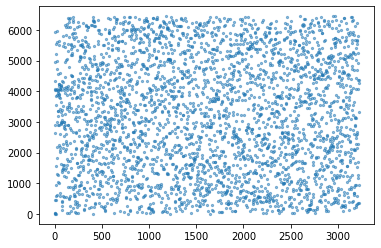

-0.009697703224409448


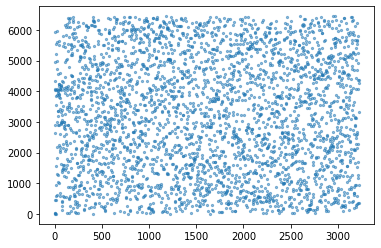

0.6000000000000001
-0.018666275516896348


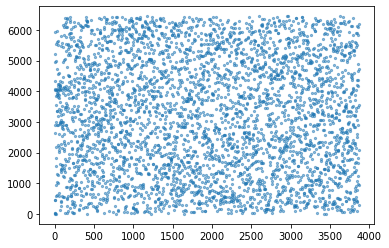

-0.018666275516896348


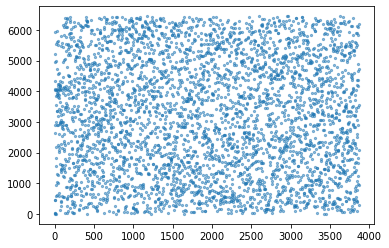

0.7000000000000001
-0.010694326082730191


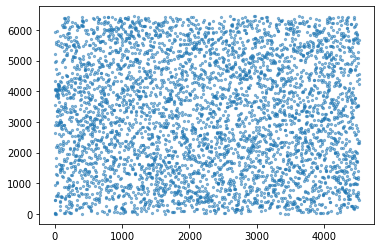

-0.010694326082730191


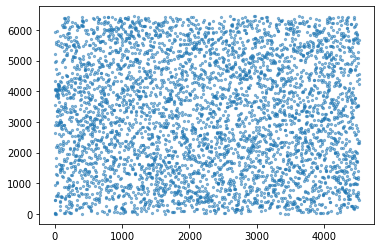

0.8
-0.007802527286246009


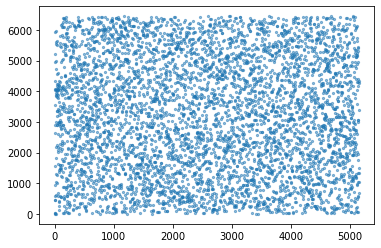

-0.007802527286246009


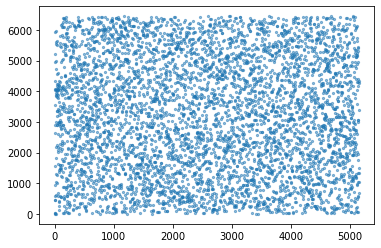

0.9
0.006246022381849216


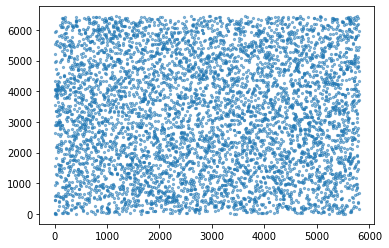

0.006246022381849216


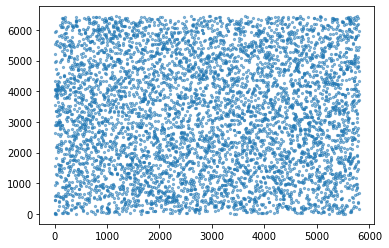

1.0
0.0067462117692585815


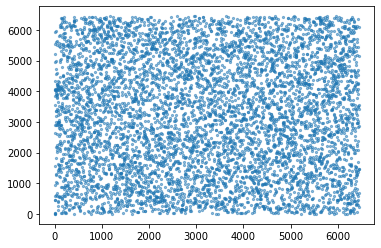

0.0067462117692585815


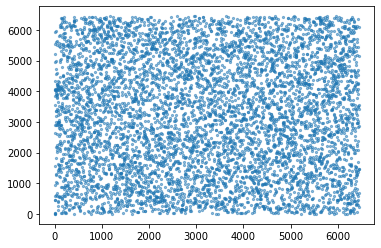

In [13]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show()

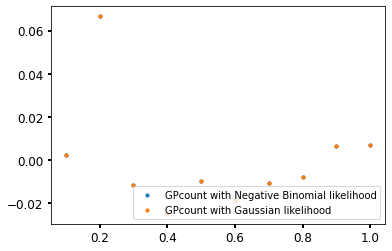

In [15]:

plt.scatter(percentage,corr_NB,s=10,label = 'GPcount with Negative Binomial likelihood')
plt.scatter(percentage,corr_G,s=10,label = 'GPcount with Gaussian likelihood')
#plt.xlabel('percentage of dataset')
#plt.ylabel('Spearman correlation')
#plt.ylim(0.,1.)
plt.tick_params(labelsize='large', width=2)  
plt.legend(bbox_to_anchor=(.23, 0), loc='lower left', ncol=1)